Using Google Trends, this project dives into manipulating and visualizing Google Trends data to find unique insights into browser popularity since 2004. There are five browsers studied here: Firefox, Safari, Chrome, Internet Explorer, and Opera. For the report, the following three key metrics are calculated:
1. Rolling Average (Simple Moving Average)
2. Quarterly Percent Change
3. Chrome Trends over the years.

Dataset: datasets/worldwide_browser_trends.csv (downloaded from https://trends.google.com/trends/explore)

This is a time series indexed by month with the search interest for each browser.
Month: each month from 2004-01 to 2020-10
Firefox: search interest for Firefox
Safari: search interest for Safari
Google Chrome: search interest for Chrome
Internet Explorer: search interest for Internet Explorer
Opera: search interest for Opera

Google defines the values of search interest as: Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

In [96]:
import pandas as pd
trends = pd.read_csv("/Users/madhankumar/Desktop/DSI/Python/Time Series/worldwide_browser_trends.csv",
                 parse_dates=['Month'],index_col='Month')
trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 202 entries, 2004-01-01 to 2020-10-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Firefox            202 non-null    int64
 1   Safari             202 non-null    int64
 2   Google Chrome      202 non-null    int64
 3   Internet Explorer  202 non-null    int64
 4   Opera              202 non-null    int64
dtypes: int64(5)
memory usage: 9.5 KB


<AxesSubplot:xlabel='Month'>

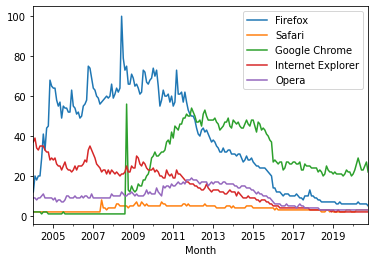

In [97]:
trends.plot()

In [98]:
trends.tail(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2020-01-01,6,2,21,2,3
2020-02-01,6,2,23,2,3
2020-03-01,6,3,26,2,3
2020-04-01,7,3,29,2,3
2020-05-01,6,3,26,2,3
2020-06-01,6,3,23,2,3
2020-07-01,6,3,23,2,3
2020-08-01,6,3,25,2,3
2020-09-01,6,3,27,2,3


 Next, the six month rolling average (a.k.a. simple moving average) for each date and browser in the dataset is to be calculated. This is to be saved as pandas DataFrame called 'rolling_sixmonths' with the column Month as the index. Null values are acceptable for dates where a rolling six month average can't be generated.

In [99]:
rolling_sixmonths=trends.rolling(window=6).mean()
rolling_sixmonths

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-06-01,6.166667,2.666667,24.666667,2.0,3.0
2020-07-01,6.166667,2.833333,25.000000,2.0,3.0
2020-08-01,6.166667,3.000000,25.333333,2.0,3.0


<AxesSubplot:xlabel='Month'>

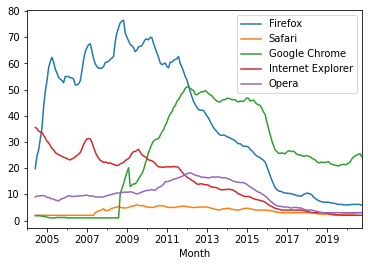

In [100]:
rolling_sixmonths.plot()

<AxesSubplot:xlabel='Month'>

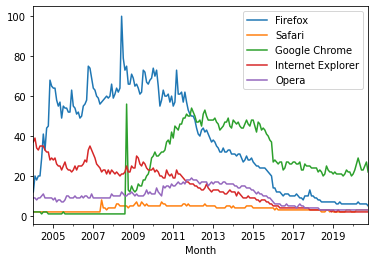

In [101]:
trends.plot()

Similar to above, creating a DataFrame called 'pct_change_quarterly' with the percentage change from the previous quarter for each date and browser. The values should be in percentage format, so 5 instead of 0.05. Since Chrome launched in late 2008, only dates during or after 2009 are included.

In [102]:
pct_change_quarterly=trends.pct_change(3)*100
pct_change_quarterly.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN
2004-04-01,66.666667,0.0,0.0,-10.810811,0.000000
2004-05-01,0.000000,0.0,0.0,-10.256410,0.000000
2004-06-01,61.111111,0.0,-50.0,2.941176,25.000000
2004-07-01,105.000000,0.0,0.0,6.060606,22.222222
2004-08-01,65.000000,0.0,0.0,-5.714286,0.000000
2004-09-01,51.724138,0.0,100.0,-8.571429,-10.000000


In [103]:

trends.head(10)

,Firefox,Safari,Google Chrome,Internet Explorer,Opera
Month,,,,,
2004-01-01,12,2,2,37,9
2004-02-01,20,2,2,39,9
2004-03-01,18,2,2,34,8
2004-04-01,20,2,2,33,9
2004-05-01,20,2,2,35,9
2004-06-01,29,2,1,35,10
2004-07-01,41,2,2,35,11
2004-08-01,33,2,2,33,9
2004-09-01,44,2,2,32,9


array([<AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>, <AxesSubplot:xlabel='Month'>,
       <AxesSubplot:xlabel='Month'>], dtype=object)

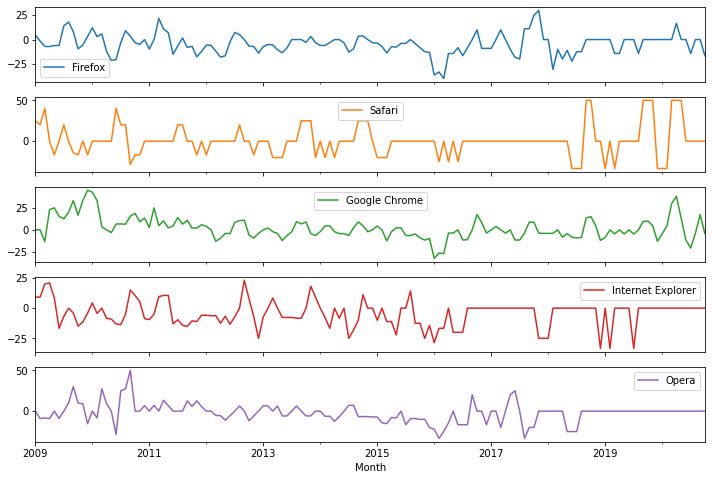

In [104]:
pct_change_quarterly=pct_change_quarterly.loc['2009':]
pct_change_quarterly.plot(subplots=True,figsize=(12,8))

Chrome eventually overtook Firefox, Chrome's growth has had its fair share of ups and downs. Next, we illustrate this by comparing Chrome's annual Google Trends performance in 2009, 2012, 2015, and 2018 in a DataFrame called 'chrome_trends'. It should hold the search interest for Chrome with four columns for each year and twelve rows for each month of the year.

In [105]:
chrome_trends = pd.DataFrame()
for year in ['2009','2012','2015','2018']:
    chrome_trends_per_year=trends.loc[year,['Google Chrome']].reset_index(drop=True)
    chrome_trends_per_year.rename(columns={'Google Chrome':year},inplace=True)
    chrome_trends = pd.concat([chrome_trends,chrome_trends_per_year],axis=1)
    print(chrome_trends)

    2009
0     13
1     12
2     13
3     16
4     15
5     15
6     18
7     18
8     20
9     21
10    24
11    29
    2009  2012
0     13    52
1     12    50
2     13    47
3     16    47
4     15    48
5     15    45
6     18    51
7     18    53
8     20    50
9     21    48
10    24    48
11    29    48
    2009  2012  2015
0     13    52    48
1     12    50    45
2     13    47    42
3     16    47    47
4     15    48    46
5     15    45    43
6     18    51    44
7     18    53    43
8     20    50    41
9     21    48    40
10    24    48    38
11    29    48    37
    2009  2012  2015  2018
0     13    52    48    24
1     12    50    45    24
2     13    47    42    24
3     16    47    47    22
4     15    48    46    23
5     15    45    43    22
6     18    51    44    20
7     18    53    43    21
8     20    50    41    25
9     21    48    40    23
10    24    48    38    22
11    29    48    37    22


<AxesSubplot:title={'center':'Chrome Search Trends for 2009, 2012, 2015 & 2018'}>

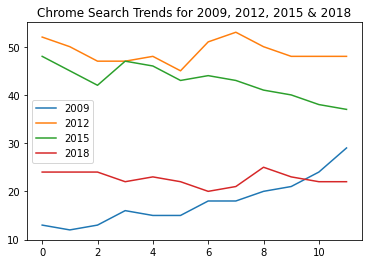

In [106]:
chrome_trends.plot(title="Chrome Search Trends for 2009, 2012, 2015 & 2018")